## An end to end scikit lean workflow

In [1]:
# 1 Get Data Ready
import pandas as pd
import numpy as np
Heart_Disease = pd.read_csv("heart-disease.csv")
Heart_Disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix) a feature is an input variable
X = Heart_Disease.drop("target", axis = 1)  #X is kind of features in sk leaern || axis=1 means we are skipping col 0 means rows

# Create Y (labels) a label is the output variable
Y = Heart_Disease["target"]

In [3]:
# 2 Choose the right model and hyperpameters(dials on model to tune it)
#Ensemble learning is a machine learning technique that combines the predictions of multiple models to create a more accurate and robust model. The idea is that by combining the strengths of multiple models, we can reduce the errors that any individual model might make.

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We keep default hyper prams
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3 Fit the model to data
from sklearn.model_selection import  train_test_split #The train_test_split function from the sklearn.model_selection library in Python splits arrays or matrices into random subsets for train and test data, respectively. It is a commonly used function in machine learning for evaluating the performance of a model.
# X: The features of the dataset.
# y: The labels of the dataset.
# y: The labels of the dataset.
# random_state: A random number generator seed.
# test_size argument is set to 0.2, which means that 20% of the dataset will be used for the test set and 80% of the dataset will be used for the training set. 

#X_train: The features of the training set.
#X_test: The features of the test set.
#Y_train: The labels of the training set.
#Y_test: The labels of the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [6]:
#3 Make a predection
#Y_label =  clf.predict(np.array[0,2,3,4]) #"object is not subscriptable" in Python sklearn means that you are trying to access an element of an object that does not support indexing.
# Getting error here because our araay looks nothing like X_train,,,, just a thing that clf will predict on data that looks like training data
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3


In [7]:
Y_preds =  clf.predict(X_test)
Y_preds

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# 4 Evaluate model on training data and test data
clf.score(X_train, Y_train)

1.0

In [9]:
clf.score(X_test, Y_test)

0.8032786885245902

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [11]:
confusion_matrix(Y_test, Y_preds)

array([[20,  6],
       [ 6, 29]], dtype=int64)

In [12]:
accuracy_score(Y_test, Y_preds)

0.8032786885245902

In [13]:
#5 Improve a model
# Try different amout of n_estimators
np.random.seed(0)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_test, Y_test)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test)}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 1.0%

Trying model with 20 estimators..
Model accuracy on test set: 1.0%

Trying model with 30 estimators..
Model accuracy on test set: 1.0%

Trying model with 40 estimators..
Model accuracy on test set: 1.0%

Trying model with 50 estimators..
Model accuracy on test set: 1.0%

Trying model with 60 estimators..
Model accuracy on test set: 1.0%

Trying model with 70 estimators..
Model accuracy on test set: 1.0%

Trying model with 80 estimators..
Model accuracy on test set: 1.0%

Trying model with 90 estimators..
Model accuracy on test set: 1.0%



In [14]:
# Save model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

1.0

### Making All Data Numerical
## Extended Car Sales Data

In [16]:
Car_Sales = pd.read_csv("car-sales-extended.csv")

In [17]:
# Split
X = Car_Sales.drop("Price", axis=1)
Y = Car_Sales["Price"]

In [18]:
# to convert objects to number other way is to do it dummies = pd.get_dummies(Car_Sales[["Make", "Colour", "Doors"]])
# Turn Categories into numbers

#HotEncoder converts and ColTrans applies to col maybe i don't know yet
from sklearn.preprocessing import OneHotEncoder #One-hot encoding is a technique used to convert categorical data into a numerical format
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough") #The ColumnTransformer class takes a list of tuples as input. Each tuple in the list specifies the name of the transformer, the transformer object itself, and the list of columns to which the transformer should be applied.
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
#Building machine learning model
from sklearn.ensemble import RandomForestRegressor
#Split into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, train_size=0.8)

# Fit the model
np.random.seed(123)
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
model.score(X_test, Y_test)

0.1766125736090549

### Handling missing values

1 Fill them with value (imputation)
2 Remove samples with missing altogether

In [21]:
Car_Sales_Missing = pd.read_csv("car-sales-extended-missing-data.csv")
Car_Sales_Missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [22]:
Car_Sales_Missing.isna().sum()
X=Car_Sales_Missing.drop("Price", axis=1)
Y=Car_Sales_Missing["Price"]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X;

## Chosing right estimator/algo/model fro your problem
    SkLearn refres to ml models, algos as estimators
    Classification problem predecting category(like heart disease)
    Regression problem - predecting a number (selling price of car)
    
    
    https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# Picking ML model for regression

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [25]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
#Import estimator
#from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Random Seed
np.random.seed(111)

# Create Data
X = housing_df.drop("target", axis=1)
Y= housing_df["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)

#Check score
model.score(Xtest, Ytest)

#Tried Lasso accura 0.29464627967544255
# Ridge accuracy 0.605283077743094
# RandomForestRegressor accuracy 0.7667762725866109

0.7667762725866109

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Random Seed
np.random.seed(111)

heart_disease = pd.read_csv("heart-disease.csv")

# Create Data
X = heart_disease.drop("target", axis=1)
Y= heart_disease["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
clf = RandomForestClassifier()
clf.fit(Xtrain, Ytrain)

#Check score
clf.score(Xtest, Ytest)

# LinearSVC accuracy = 0.45267489711934156

0.7489711934156379

# TIP
> For structured data use ensemble
> For unstructred data use deep learning or transfer learning

# Making predection using a ML model (training)
2 ways
    predict()
    predict_proba()

In [28]:
clf.predict(Xtest)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1], dtype=int64)

In [29]:
np.array(Ytest)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1], dtype=int64)

In [30]:
np.mean(clf.predict(Xtest) == Ytest)

0.7489711934156379

In [31]:
clf.score(Xtest, Ytest) # So no diff predict is longway of score LOL

0.7489711934156379

In [32]:
#<<<<<<<<<<<<<<<<<<<<<predict_proba>>>>>>>>>>>>>>>>>>>>>>>>#
clf.predict_proba(Xtest[:5]) # Left is probability for lebel being 0 and Right is probability for lebel being 1

array([[0.28, 0.72],
       [0.31, 0.69],
       [0.85, 0.15],
       [0.45, 0.55],
       [0.45, 0.55]])

In [33]:
clf.predict(Xtest[:5]) # above if right is grate predection is right and viceversa

array([1, 1, 0, 1, 1], dtype=int64)

In [34]:
## Using predict on regression
from sklearn.ensemble import RandomForestRegressor

# Random Seed
np.random.seed(111)

# Create Data
X = housing_df.drop("target", axis=1)
Y= housing_df["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)

Ypreds = model.predict(Xtest)

In [35]:
Ypreds[:10]

array([1.84133  , 0.75397  , 1.36056  , 1.22851  , 1.57663  , 3.7970208,
       1.3704   , 1.63951  , 1.39539  , 1.5133401])

In [36]:
np.array(Ytest[:10])

array([2.75 , 0.798, 0.96 , 0.996, 1.33 , 3.489, 1.5  , 1.583, 1.082,
       2.262])

In [37]:
#average diff bw prediction and truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Ytest, Ypreds)

0.3785596442768897

# Cross Validation instead of score

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Random Seed
np.random.seed(111)

heart_disease = pd.read_csv("heart-disease.csv")

# Create Data
X = heart_disease.drop("target", axis=1)
Y= heart_disease["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
clf = RandomForestClassifier()
clf.fit(Xtrain, Ytrain)

from sklearn.model_selection import cross_val_score
Accuracies_DF = pd.DataFrame({"Accuracy":np.array(cross_val_score(clf, X, Y, cv = 10))}) # Will select test data from 10 different locations in dataset
Accuracies_DF

,Accuracy
0,0.870968
1,0.806452
2,0.838710
3,0.900000
4,0.866667
5,0.766667
6,0.700000
7,0.833333
8,0.766667
9,0.833333


In [39]:
clf.score(Xtest, Ytest),  np.mean(Accuracies_DF["Accuracy"])

(0.7489711934156379, 0.818279569892473)

# Classification model evaluation metrics
1 Accuracy
2 Area under ROC curve
3 Confusion matrix
4 Classification report

In [40]:
#Accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,Y, cv=5)



array([0.85245902, 0.8852459 , 0.80327869, 0.81666667, 0.76666667])

In [41]:
# 2 Area under ROC
#ROC curve are comparison of model's true positive rate vs flase positive rate
# True positive = model predicts 1 when truth is 1
# False Positive = model predicts 1 turth is 0
# True Negative = model predicts 0 when truth is 0
# False Negative = model predicts 0 when truth is 1

from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(Xtest)
pd.DataFrame(y_probs)

,0,1
0,0.28,0.72
1,0.31,0.69
2,0.85,0.15
3,0.45,0.55
4,0.45,0.55
...,...,...
238,0.33,0.67
239,0.19,0.81
240,0.75,0.25
241,0.69,0.31


In [42]:
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(Ytest, y_probs_positive)
pd.Series(fpr)

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
68    0.923077
69    0.942308
70    0.961538
71    0.971154
72    1.000000
Length: 73, dtype: float64

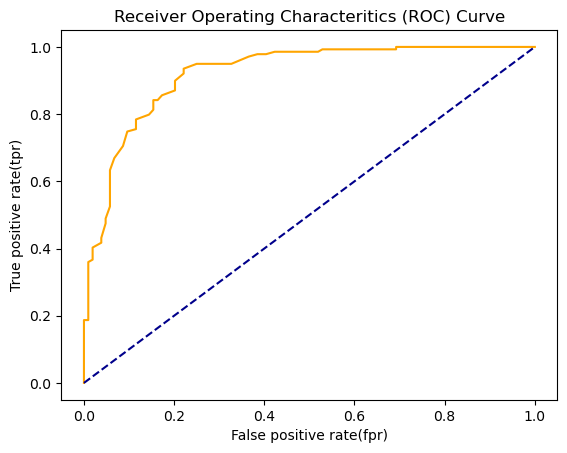

In [43]:
# Create function for plottiing for ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given false positive rate (fpr)
    and true positive ratr (tpr) of model.
    """
    
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predective power(baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Characteritics (ROC) Curve")
    plt.show()
    
plot_roc_curve(fpr,tpr)


In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Ytest, y_probs_positive)

0.9204482567791921

# Evaluation via Confusion Matrix 
-> A confusion matrix is quick way to compare the lables a model predicts and actual lables it was supposed to predict
    In essence giving you an idea of where the model is getting confused

In [45]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(Xtest)
confusion_matrix(Ytest, y_preds)

array([[98,  6],
       [55, 84]], dtype=int64)

In [46]:
pd.crosstab(Ytest, y_preds, rownames=["Actual Lables"], colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Lables,,
0,98,6
1,55,84


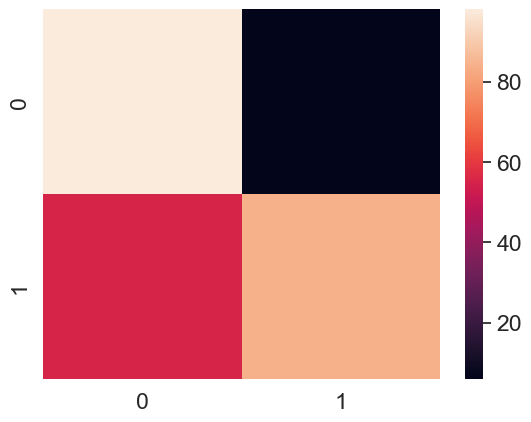

In [47]:
# Visualize confusion matrix
import seaborn as sns

#Set font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(Ytest, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

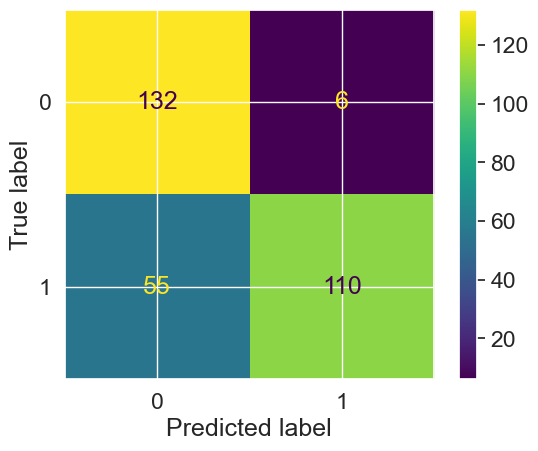

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=Y) # Can use this one without preds as it does predection it self

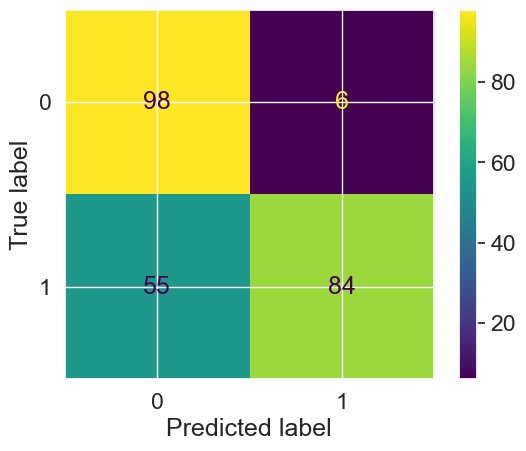

In [49]:
ConfusionMatrixDisplay.from_predictions(y_true=Ytest, y_pred=y_preds)

## Classification Report
**Is combation on confusion matrixs**

In [50]:
from sklearn.metrics import classification_report

print(classification_report(Ytest, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       104
           1       0.93      0.60      0.73       139

    accuracy                           0.75       243
   macro avg       0.79      0.77      0.75       243
weighted avg       0.81      0.75      0.75       243



## Regression  model evaluation mertrics

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Random Seed
np.random.seed(111)

# Create Data
X = housing_df.drop("target", axis=1)
Y= housing_df["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)

#Check score
model.score(Xtest, Ytest)

0.7667762725866109

In [52]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
Ytest_mean = np.full(len(Ytest), Ytest.mean())
Ytest_mean

array([2.06426966, 2.06426966, 2.06426966, ..., 2.06426966, 2.06426966,
       2.06426966])

In [53]:
r2_score(y_true=Ytest, y_pred=Ytest_mean)

0.0

## Mean absolute error (MAE)**
MAE is the average of the absolute differences between predections and actual values
It gives you an idea of how wrong your models predections are.

In [54]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(Xtest)
mae = mean_absolute_error(Ytest, y_preds)
mae

0.3785596442768897

## MSE Mean Squared Error

In [55]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(Xtest)
mse = mean_squared_error(Ytest, y_preds)
mse

0.308774439042011

### Usingscoring parameter

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Random Seed
np.random.seed(111)

heart_disease = pd.read_csv("heart-disease.csv")

# Create Data
X = heart_disease.drop("target", axis=1)
Y= heart_disease["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
clf = RandomForestClassifier()



In [57]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X, Y, cv=5, scoring=None) #if scoring is None default evaluation metrix used which is accuracy
cv_acc.mean()

0.8248087431693989

In [58]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, Y, cv=5, scoring="precision")
cv_precision.mean()

0.8329547346025924

In [59]:
#Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,Y, scoring="recall")
cv_recall.mean()

0.8545454545454545

##### Scoring Prams for Regression

In [60]:
## Using predict on regression
from sklearn.ensemble import RandomForestRegressor

# Random Seed
np.random.seed(111)

# Create Data
X = housing_df.drop("target", axis=1)
Y= housing_df["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
model = RandomForestRegressor()


In [61]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, Y, cv=3, scoring=None)
cv_r2.mean()

0.6545458023124507

In [62]:
#Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, X, Y, cv=3, scoring="neg_mean_squared_error")
cv_mse.mean()

-0.46141356443710196

In [63]:
#Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, X, Y, cv=3, scoring="neg_mean_absolute_error")
cv_mae.mean()

-0.4835773816036823

## Using different evaluation m,etrics as sk learn functions



In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

heart_disease = pd.read_csv("heart-disease.csv")

# Create Data
X = heart_disease.drop("target", axis=1)
Y= heart_disease["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
clf = RandomForestClassifier()
clf.fit(Xtrain, Ytrain)
y_preds = clf.predict(Xtest)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(Ytest, y_preds)*100:.2f}% ")
print(f"Precision: {precision_score(Ytest, y_preds)*100:.2f}% ")
print(f"Recall: {recall_score(Ytest, y_preds)*100:.2f}% ")
print(f"F1: {f1_score(Ytest, y_preds)*100:.2f}% ")

Classifier metrics on the test set
Accuracy: 83.13% 
Precision: 80.79% 
Recall: 91.04% 
F1: 85.61% 


In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create Data
X = housing_df.drop("target", axis=1)
Y= housing_df["target"]

#Split into test train
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.8)

#Instaitate n fit
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
y_preds = model.predict(Xtest)

print("Regresser metrics on the test set")
print(f"r2_score: {r2_score(Ytest, y_preds)*100:.2f}% ")
print(f"mean_absolute_error: {mean_absolute_error(Ytest, y_preds)*100:.2f}% ")
print(f"mean_squared_error: {mean_squared_error(Ytest, y_preds)*100:.2f}% ")

Regresser metrics on the test set
r2_score: 77.09% 
mean_absolute_error: 37.43% 
mean_squared_error: 30.42% 


## Improving a Model


First predictions = baseline predictions.
First model = baseline model

From a data perspective:
   * Could we collect more data? 
   * Could we improve the current model?
    
Hyperparameter vs Parameters
   * Parameters = model find these patterns in data
   * Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns
   
Three ways to adkust hyperparameters:
1. By Hand
2. Randomly woth RandomSearchCV
3. Exhaustivelty with GridSearchCV

### Tuning Hyperparameters by Hand
Let's make 3 sets, training, validation, test

In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### We will try following

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [67]:
def evaluate_preds(y_true, y_preds):
    """
    Preforms evaluation comparison on y_true lables vs y_preds lables on classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = { "accuracy": round(accuracy,2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 score: {f1 * 100:.2f}%")
    return metric_dict

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
np.random.seed(42)

#Shuffule data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X&Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

# Split the data into train validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, Y_train = X[:train_split], Y[:train_split]
X_valid, Y_valid = X[train_split:valid_split], Y[train_split:valid_split]
X_test, Y_test = X[valid_split:], Y[valid_split:]

clf.fit(X_train, Y_train)

#Make baseline predicition
y_preds = clf.predict(X_valid)

# Evaluate classifier on validation set
baseline_metrics = evaluate_preds(Y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [72]:
np.random.seed(42)
#Create a second classifier
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train, Y_train)

#make predictions with different hyperparameters
y_preds_2 = clf2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(Y_valid, y_preds_2)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 score: 84.00%


In [73]:
np.random.seed(42)
#Create a tird classifier
clf3 = RandomForestClassifier(n_estimators=100)
clf3.fit(X_train, Y_train)

#make predictions with different hyperparameters
y_preds_3 = clf3.predict(X_valid)

#Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(Y_valid, y_preds_3)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 score: 84.00%


### 5.2 Hyperparameter tuning with RandmizedSearchCV

In [77]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6,],
       "min_samples_leaf": [1,2,4]}
np.random.seed(42)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=-1) #Njobs cpu to dedicate to train -1 = all

#Setup Randomized search cv
rs_clf = RandomizedSearchCV(estimator=clf
                            ,param_distributions=grid
                            ,n_iter=10 #number of models to try
                            ,cv=5, # 5 fold cross validation
                            verbose=2)
# fit the RandomizedSearchCv version of clf
rs_clf.fit(X_train, Y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Others\ML_Un

In [78]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [79]:
# Make predections with best hyperparams
rs_y_preds = rs_clf.predict(X_test)
#Evaluate predections
rs_metrics = evaluate_preds(Y_test, rs_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


### 5.3 Hyperparameter tuning with GridSearchCV
* Is like a brute force will try every possible combination to find best

In [81]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [94]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and Y
X = heart_disease_shuffled.drop("target", axis=1)
Y = heart_disease_shuffled["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=-1) #Njobs cpu to dedicate to train -1 = all

#Setup Grid search cv
gs_clf = GridSearchCV(estimator=clf
                            ,param_grid=grid
                            ,cv=5, # 5 fold cross validation
                            verbose=2)
# fit the RandomizedSearchCv version of clf
gs_clf.fit(X_train, Y_train);

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_sampl

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_sa

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=sqr

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, 

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqr

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, m

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   0.4s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, mi

D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1350 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\Others\ML_Understanding\.env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\Others

In [95]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [96]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate predections
gs_metrics = evaluate_preds(Y_test, gs_y_preds)

Acc: 81.97%
Precision: 72.97%
Recall: 96.43%
F1 score: 83.08%


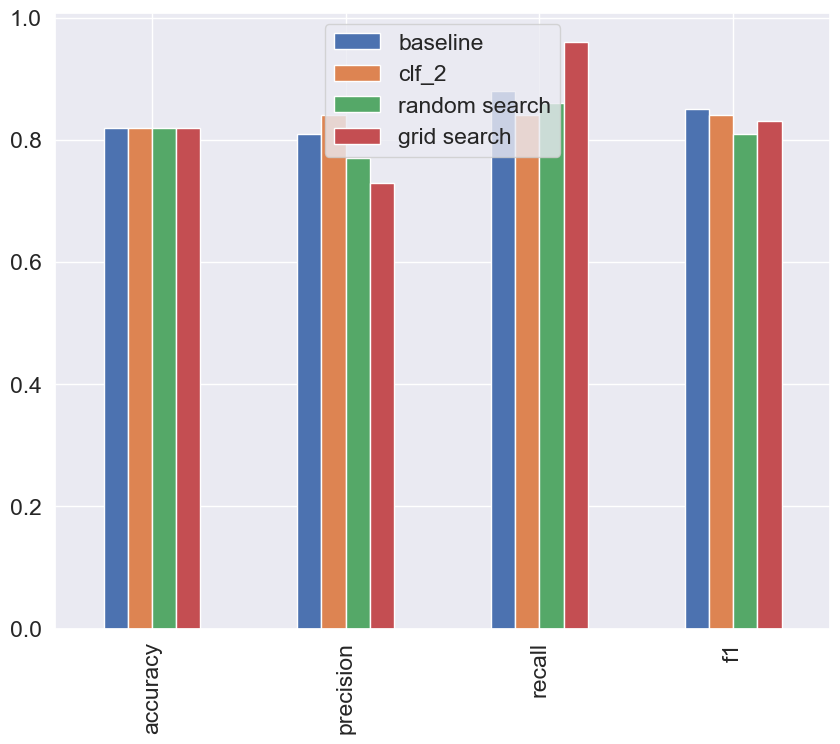

In [97]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## sAVING  AND LOADING TRAINED ML MODELS

tWO WAYS TO SAVE AND LOAD
1. uSING `pICKLE`
2. USING `JOBLIB`

**pickle**

In [98]:
import pickle

#Save
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [99]:
#L:oad saved
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [101]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

NameError: name 'y_test' is not defined

**JobLIb**

In [102]:
from joblib import dumb, load
# SAve a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

ImportError: cannot import name 'dumb' from 'joblib' (D:\Others\ML_Understanding\.env\lib\site-packages\joblib\__init__.py)

In [ ]:
#import saved joblib model
loaded_job_lib_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
joblib_y_preds = loaded_job_lib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)